In [0]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Volumes/workspace/default/netflixdata/netflix_titles_cleaned.csv"
df = pd.read_csv(file_path)
print(df.info())
print(df.head())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        8807 non-null   object 
 1   type           8807 non-null   object 
 2   title          8807 non-null   object 
 3   director       8807 non-null   object 
 4   cast           8807 non-null   object 
 5   country        8807 non-null   object 
 6   date_added     8807 non-null   object 
 7   release_year   8807 non-null   int64  
 8   rating         8807 non-null   object 
 9   duration       8807 non-null   object 
 10  listed_in      8807 non-null   object 
 11  description    8807 non-null   object 
 12  duration_num   8807 non-null   float64
 13  duration_unit  8807 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 963.4+ KB
None
  show_id     type  ... duration_num duration_unit
0      s1    Movie  ...         90.0           min
1      s2  TV Sho

In [0]:

df_feat = df.copy()

# Handle missing duration values
df_feat['duration'] = df_feat['duration'].fillna('Unknown')

# Split logic for Movies and TV Shows
def get_length_category(row):
    if row['type'] == 'Movie':
        if 'min' in row['duration']:
            minutes = int(row['duration'].replace(' min', '').strip())
            if minutes <= 60:
                return 'Short'
            elif minutes <= 120:
                return 'Medium'
            else:
                return 'Long'
        else:
            return 'Unknown'
    elif row['type'] == 'TV Show':
        if 'Season' in row['duration']:
            seasons = int(row['duration'].split()[0])
            if seasons == 1:
                return 'Limited'
            elif seasons <= 4:
                return 'Moderate'
            else:
                return 'Long-running'
        else:
            return 'Unknown'
    else:
        return 'Unknown'

# Apply function
df_feat['Content_Length_Category'] = df_feat.apply(get_length_category, axis=1)

# Check result
display(df_feat[['type', 'duration', 'Content_Length_Category']].head(10))


type,duration,Content_Length_Category
Movie,90 min,Medium
TV Show,2 Seasons,Moderate
TV Show,1 Season,Limited
TV Show,1 Season,Limited
TV Show,2 Seasons,Moderate
TV Show,1 Season,Limited
Movie,91 min,Medium
Movie,125 min,Long
TV Show,9 Seasons,Long-running
Movie,104 min,Medium


In [0]:
# Create a new column based on title text only
df_feat['is_original'] = df_feat['title'].apply(
    lambda x: 'Original' if 'Netflix' in str(x) else 'Licensed'
)

# Show only title and is_original columns
display(df_feat[['title', 'is_original']].head(10))



title,is_original
Dick Johnson Is Dead,Licensed
Blood & Water,Licensed
Ganglands,Licensed
Jailbirds New Orleans,Licensed
Kota Factory,Licensed
Midnight Mass,Licensed
My Little Pony: A New Generation,Licensed
Sankofa,Licensed
The Great British Baking Show,Licensed
The Starling,Licensed


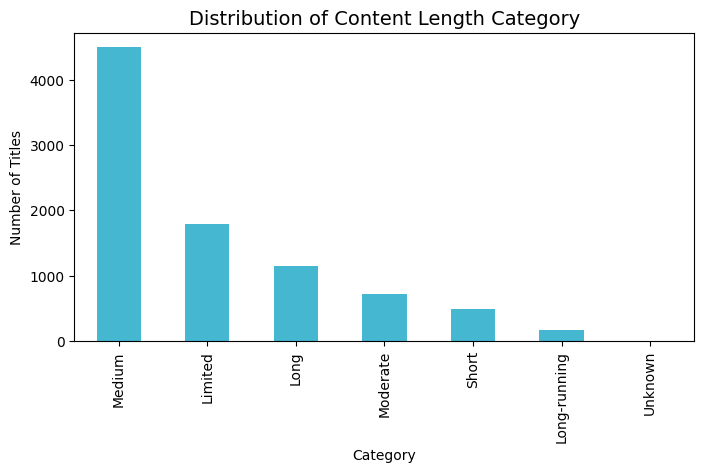

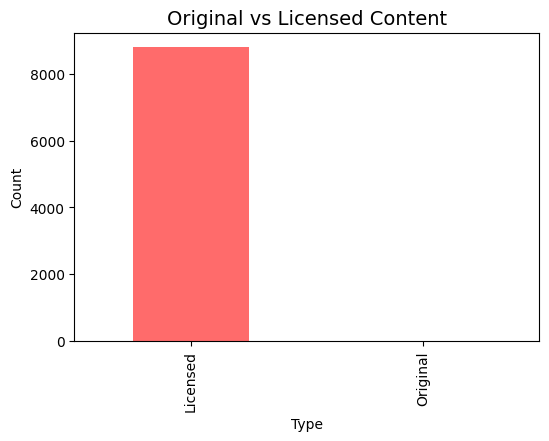

In [0]:
import matplotlib.pyplot as plt

# Content Length Category
plt.figure(figsize=(8,4))
df_feat['Content_Length_Category'].value_counts().plot(kind='bar', color='#45B7D1')
plt.title("Distribution of Content Length Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Number of Titles")
plt.show()

# Original vs Licensed
plt.figure(figsize=(6,4))
df_feat['is_original'].value_counts().plot(kind='bar', color=['#FF6B6B','#4ECDC4'])
plt.title("Original vs Licensed Content", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


In [0]:
#Number of originals released each year
# Filter only Originals
originals = df_feat[df_feat['is_original'] == 'Original']

# Count number of Originals released each year
originals_per_year = originals['release_year'].value_counts().sort_index()

# Display as table
display(originals_per_year)


release_year
2016    1
2017    1
2020    1
2021    1
Name: count, dtype: int64

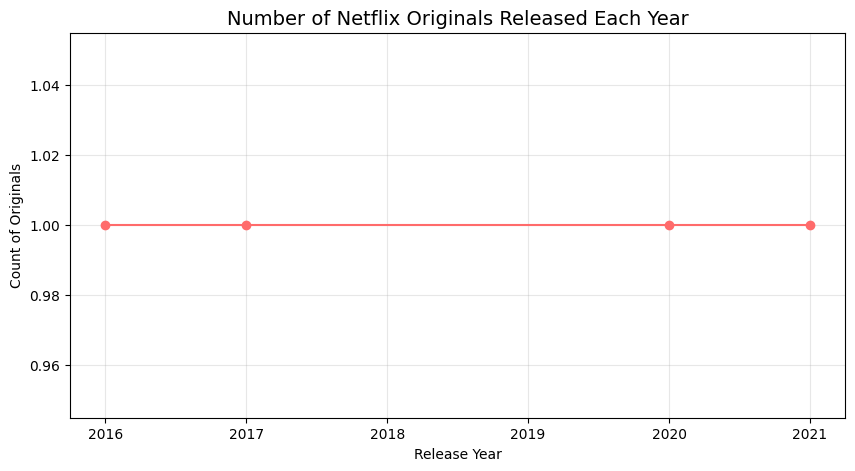

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(originals_per_year.index, originals_per_year.values, marker='o', color='#FF6B6B')
plt.title("Number of Netflix Originals Released Each Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Count of Originals")
plt.grid(True, alpha=0.3)
plt.show()


In [0]:

df_feat = df_feat.copy()

# fill missing countries
df_feat['country'] = df_feat['country'].fillna('Unknown')

# define region mapping
region_map = {
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'China': 'Asia',
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
}

# function to map the first country to its region
def get_region(country_str):
    if pd.isna(country_str) or country_str == 'Unknown':
        return 'Unknown'
    first_country = country_str.split(',')[0].strip()
    return region_map.get(first_country, 'Other')

# apply mapping
df_feat['Region'] = df_feat['country'].apply(get_region)

# check few results
display(df_feat[['country', 'Region']].head(10))


country,Region
United States,North America
South Africa,Other
Unknown,Unknown
Unknown,Unknown
India,Asia
Unknown,Unknown
Unknown,Unknown
"United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",North America
United Kingdom,Europe
United States,North America


Region
North America    3616
Asia             1578
Other            1364
Europe           1124
Unknown           831
South America     160
Oceania           134
Name: count, dtype: int64

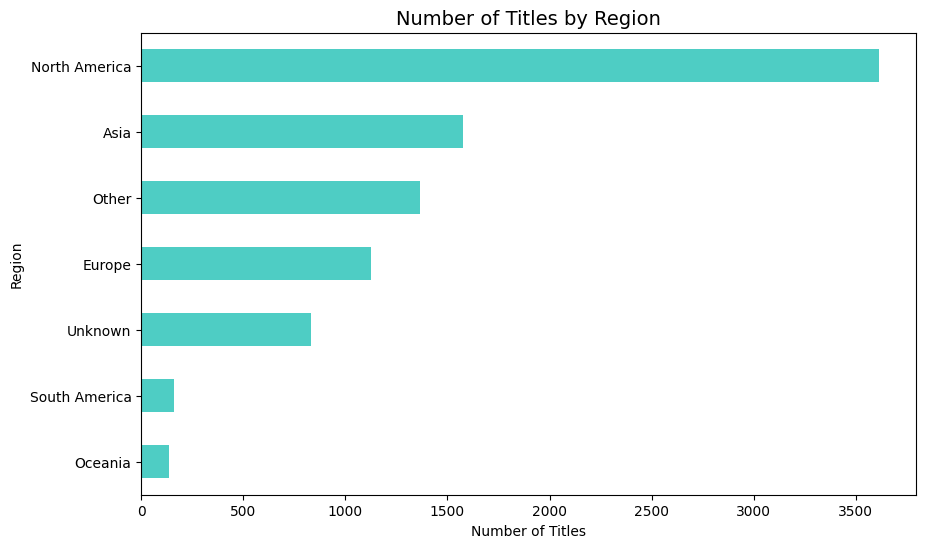

In [0]:
import matplotlib.pyplot as plt

region_counts = df_feat['Region'].value_counts()
display(region_counts)
plt.figure(figsize=(10,6))
region_counts.plot(kind='barh', color='#4ECDC4')
plt.title("Number of Titles by Region", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Region")
plt.gca().invert_yaxis()  # highest count on top
plt.show()



In [0]:
# Convert 'date_added' to datetime
df_feat['date_added'] = pd.to_datetime(df_feat['date_added'], errors='coerce')

# Extract year from it
df_feat['Year'] = df_feat['date_added'].dt.year

# Check
display(df_feat[['title', 'release_year', 'date_added', 'Year']].head(10))


title,release_year,date_added,Year
Dick Johnson Is Dead,2020,2021-09-25T00:00:00.000Z,2021
Blood & Water,2021,2021-09-24T00:00:00.000Z,2021
Ganglands,2021,2021-09-24T00:00:00.000Z,2021
Jailbirds New Orleans,2021,2021-09-24T00:00:00.000Z,2021
Kota Factory,2021,2021-09-24T00:00:00.000Z,2021
Midnight Mass,2021,2021-09-24T00:00:00.000Z,2021
My Little Pony: A New Generation,2021,2021-09-24T00:00:00.000Z,2021
Sankofa,1993,2021-09-24T00:00:00.000Z,2021
The Great British Baking Show,2021,2021-09-24T00:00:00.000Z,2021
The Starling,2021,2021-09-24T00:00:00.000Z,2021


In [0]:
# Fill missing ratings
df_feat['rating'] = df_feat['rating'].fillna('Unknown')

# Define mapping
age_group_map = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'G': 'Kids',
    'TV-PG': 'Teens',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-14': 'Adults',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'NC-17': 'Adults',
    'NR': 'Unknown',
    'Unknown': 'Unknown'
}

# Create new column
df_feat['Content_Age_Group'] = df_feat['rating'].map(age_group_map).fillna('Unknown')

# Check result
display(df_feat[['title', 'rating', 'Content_Age_Group']].head(15))


title,rating,Content_Age_Group
Dick Johnson Is Dead,PG-13,Teens
Blood & Water,TV-MA,Adults
Ganglands,TV-MA,Adults
Jailbirds New Orleans,TV-MA,Adults
Kota Factory,TV-MA,Adults
Midnight Mass,TV-MA,Adults
My Little Pony: A New Generation,PG,Teens
Sankofa,TV-MA,Adults
The Great British Baking Show,TV-14,Adults
The Starling,PG-13,Teens


Content_Age_Group
Adults     70.0
Teens      18.6
Kids       10.2
Unknown     1.1
Name: count, dtype: float64

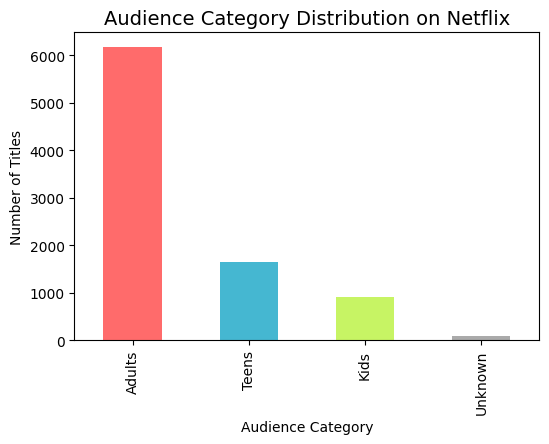

In [0]:
audience_counts = df_feat['Content_Age_Group'].value_counts()
audience_percent = round((audience_counts / audience_counts.sum()) * 100, 1)

display(audience_percent)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
audience_counts.plot(kind='bar', color=['#FF6B6B', '#45B7D1', '#C7F464', '#AAAAAA'])
plt.title("Audience Category Distribution on Netflix", fontsize=14)
plt.xlabel("Audience Category")
plt.ylabel("Number of Titles")
plt.show()
